# Banking Customer Churn – Exploratory Data Analysis (EDA)

**Project Title:** Banking Customer Churn Analysis

**Problem Statement:** Analyze customer data to identify patterns influencing churn and provide business recommendations.

**Objectives:**
- Understand dataset
- Perform data wrangling & cleaning
- Conduct univariate, bivariate, multivariate analysis
- Generate insights and recommendations

**Tools:** Python, NumPy, Pandas, Matplotlib, Seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


## Dataset Loading

In [ ]:
df = pd.read_csv(r'/content/sample_data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Dataset Overview

In [ ]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


((10000, 14), None)

## Statistical Summary

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Dictionary

In [ ]:
data_dict = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.values
})
data_dict

,Column,Data Type
0,RowNumber,int64
1,CustomerId,int64
2,Surname,object
3,CreditScore,int64
4,Geography,object
5,Gender,object
6,Age,int64
7,Tenure,int64
8,Balance,float64
9,NumOfProducts,int64


## Data Wrangling

In [ ]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.rename(columns={'Exited':'Churn'}, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Creation

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,45,60,100], labels=['Young','Adult','Senior','Elder'])
df['BalanceZero'] = df['Balance'].apply(lambda x: 1 if x==0 else 0)
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0,3,6,10], labels=['Low','Medium','High'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,AgeGroup,BalanceZero,TenureGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,1,Low
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,0,Low
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,0,High
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,1,Low
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,0,Low


## Data Cleaning

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## Univariate Analysis

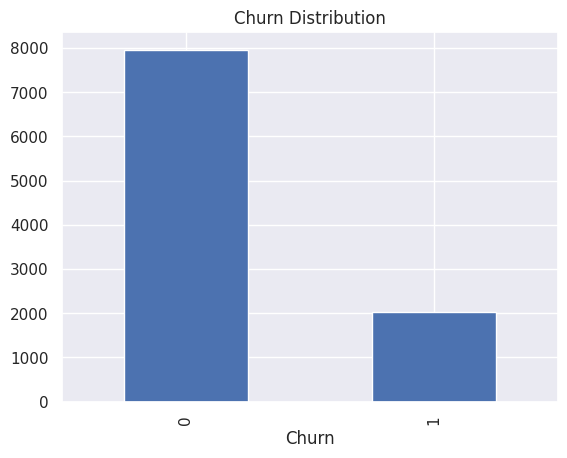

In [ ]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.show()

**Insight:** Majority of customers are retained; churned customers are fewer.

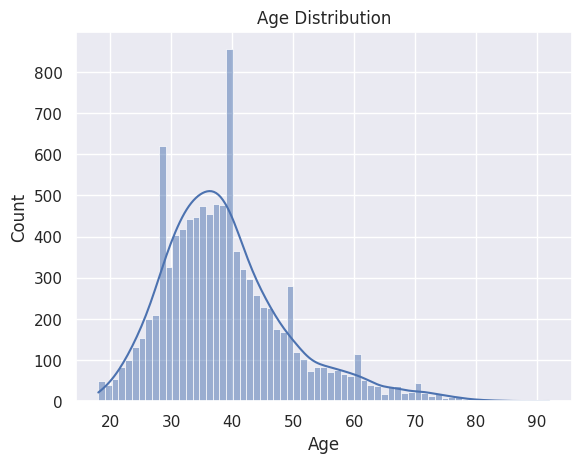

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

**Insight:** Most customers fall between 30–45 age range.

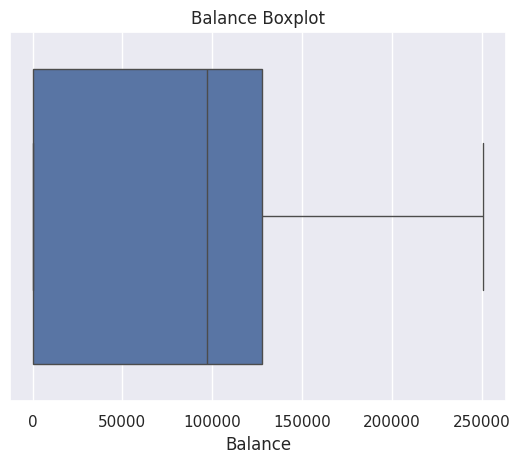

In [ ]:
sns.boxplot(x=df['Balance'])
plt.title('Balance Boxplot')
plt.show()

**Insight:** Presence of outliers in balance.

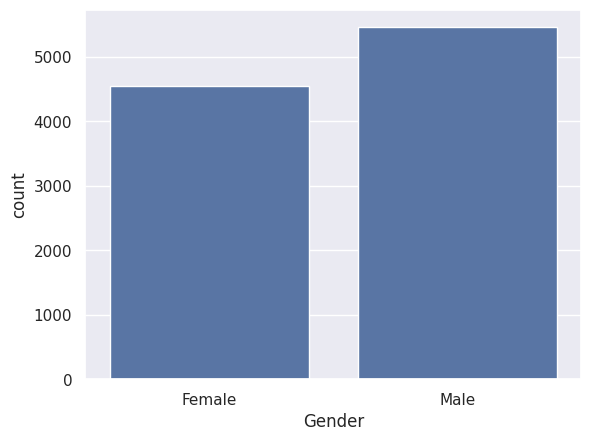

In [ ]:
sns.countplot(x='Gender', data=df)
plt.show()

**Insight:** Gender distribution is balanced.

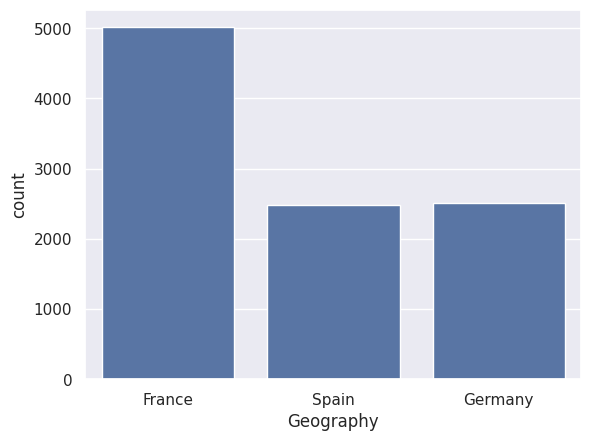

In [ ]:
sns.countplot(x='Geography', data=df)
plt.show()

**Insight:** Majority customers from France.

## Bivariate Analysis

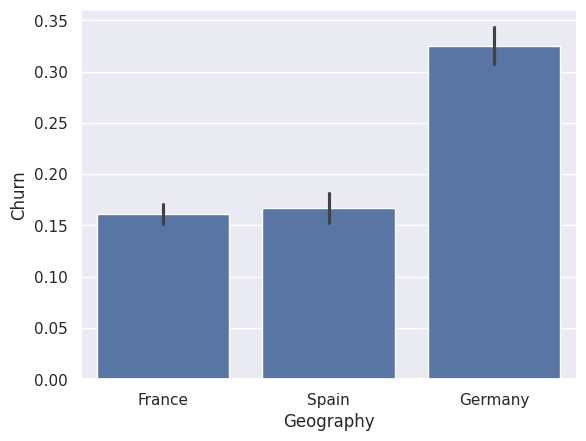

In [ ]:
sns.barplot(x='Geography', y='Churn', data=df)
plt.show()

**Insight:** Churn rate varies by geography.

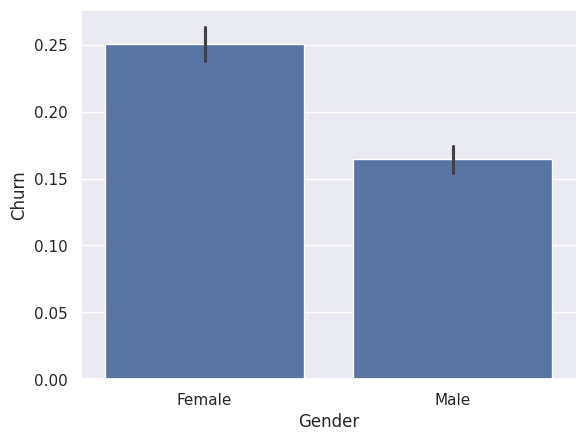

In [ ]:
sns.barplot(x='Gender', y='Churn', data=df)
plt.show()

**Insight:** Gender shows minor churn difference.

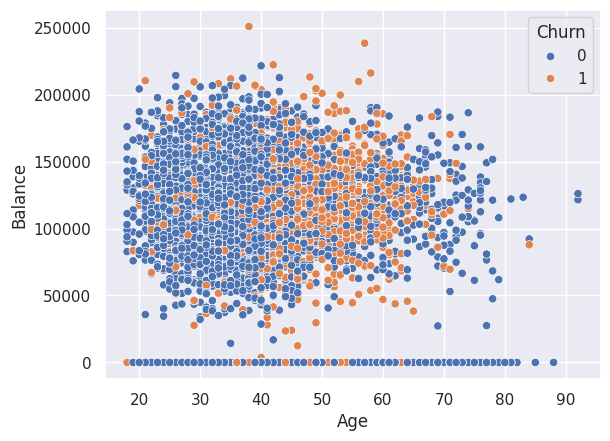

In [ ]:
sns.scatterplot(x='Age', y='Balance', hue='Churn', data=df)
plt.show()

**Insight:** Higher age linked with churn tendency.

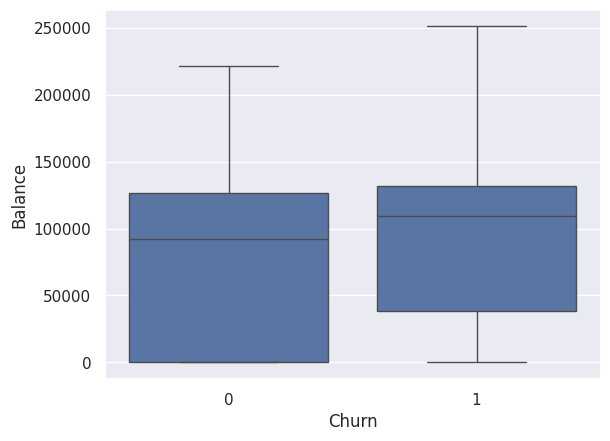

In [ ]:
sns.boxplot(x='Churn', y='Balance', data=df)
plt.show()

**Insight:** Churned customers often maintain higher balances.

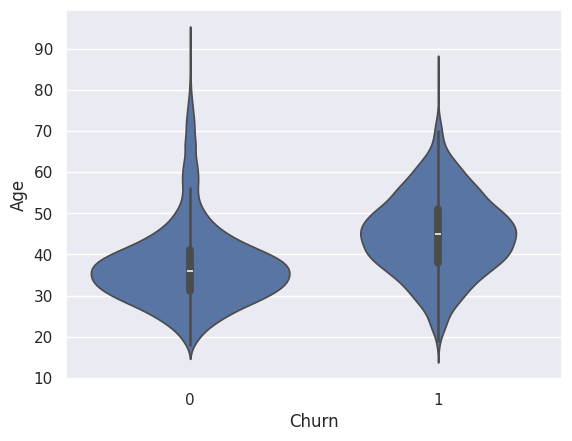

In [ ]:
sns.violinplot(x='Churn', y='Age', data=df)
plt.show()

**Insight:** Older customers churn more frequently.

## Multivariate Analysis

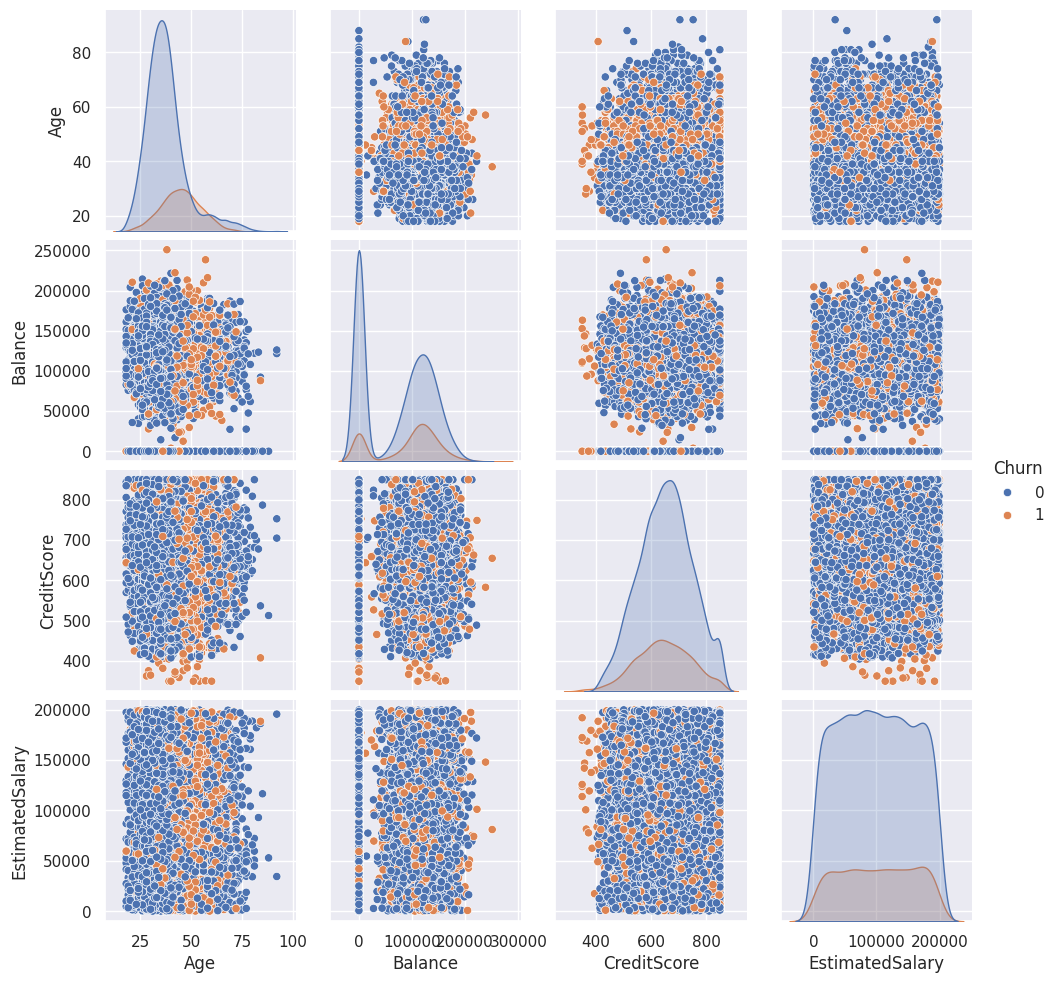

In [ ]:
sns.pairplot(df[['Age','Balance','CreditScore','EstimatedSalary','Churn']], hue='Churn')
plt.show()

**Insight:** Multivariate relations indicate age and balance influence churn.

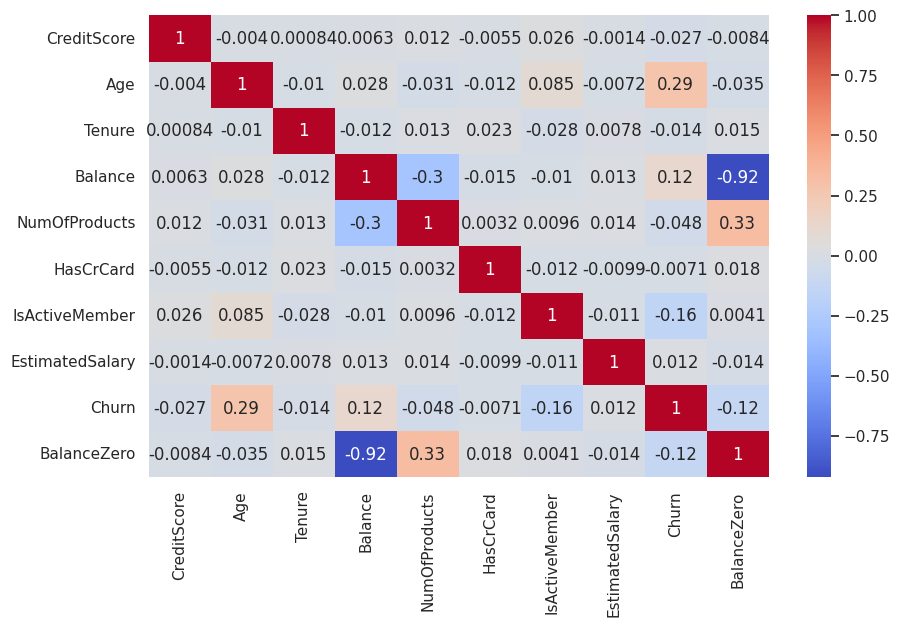

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

**Insight:** Age shows positive correlation with churn.

## Key Insights Summary
- Age and Balance are key churn indicators
- Geography influences churn
- Zero balance customers less likely to churn

## Conclusion
EDA indicates demographic and financial attributes significantly impact churn behavior.

## Recommendations
- Focus retention on older customers
- Provide incentives for high-balance customers
- Improve services in high-churn regions